In [193]:
import os

directory = 'E:/1_Научная работа/Collimator_100_0_line' #
list_of_files = os.listdir(directory) #список файлов
bulls= [] # временный список
for i in list_of_files:
    with open(directory + '/'+ i, 'r') as f:
        tmp=f.readlines()
        bulls.append(tmp)

chanel=[] # список массивов каналов
for j in bulls:
    a = j[0].split(' ') # чтение живого времени
    t = a[3] 
    t=t.replace(',', '.')
    time=float(t[:len(t)-2])
    #print('Живое время = ',time, ' секунд')
    ch = []           # список каналов
    for i in range(2,4098):  # чтение импульсов в каналах
        a = j[i].split(' ')
        ch.append(a[2])
    ch=list(map(float, ch))    
    ch=list(map(lambda x: x/time,ch))
    chanel.append(ch)
# сейчас у меня есть список из 11 элементов, каждый из которых это массив импульсов по каналам.   
# а последний элемент(12ый), это массив импульсов для фона 

# вычитаем фон 

for i in range(11):
    for p in range(4096):
        chanel[i][p]=chanel[i][p]-chanel[11][p]
        if (chanel[i][p]<0):
            chanel[i][p]=0


In [194]:
# добавляю в Excel входные данные

import xlwt

book = xlwt.Workbook(encoding="utf-8")
sheet1 = book.add_sheet('Входные данные')

row_first = sheet1.row(0)

row_first.write(0, 'Номер канала')

c = 0
for i in range(1, 12):
    row_first.write(i, 'x = ' + str(c) + ' cm')
    c = c + 10

for i in range(1,4097):
    row = sheet1.row(i)
    row.write(0, i)
    for index in range(1, 12):
        row.write(index, chanel[index - 1][i - 1])
        
# book.save("test.xls")        

In [195]:
#сглаживаение полиномом 2-ой степени по 9-ти точкам

sheet2 = book.add_sheet('Фильтр по 9-ти точкам')
row_first = sheet2.row(0)
row_first.write(0, 'Номер канала')

c = 0
for i in range(1, 12):
    row_first.write(i, 'x = ' + str(c) + ' cm')
    c = c + 10
    
ch_9 = []

for i in range(11):
    ch_ = []
    for p in range(4096):
        ch_.append(chanel[i][p])
    ch_9.append(ch_)

for i in range(11):
    
    ch_9_tmp = []
    
    for p in range (4,4092):
        Am = 231
        sgla = (1/Am)*((-21)*ch_9[i][p-4] + 14*ch_9[i][p-3] + 39*ch_9[i][p-2] + 54*ch_9[i][p-1] + 59*ch_9[i][p] + 54*ch_9[i][p+1] + 39*ch_9[i][p+2] + 14*ch_9[i][p+3] - 21*ch_9[i][p+4])
        ch_9_tmp.append(sgla)
    
    for p in range(4,4092):
        if ch_9_tmp[p - 4] >= 0:
            ch_9[i][p] = ch_9_tmp[p - 4]

for i in range(1,4097):
    row = sheet2.row(i)
    row.write(0, i)
    for index in range(1, 12):
        row.write(index, ch_9[index - 1][i - 1])

In [196]:
#сглаживаение полиномом 2-ой степени по 11-ти точкам

sheet3 = book.add_sheet('Фильтр по 11-ти точкам')
row_first = sheet3.row(0)
row_first.write(0, 'Номер канала')

c = 0
for i in range(1, 12):
    row_first.write(i, 'x = ' + str(c) + ' cm')
    c = c + 10

ch_11 = [] 

for i in range(11):
    ch_ = []
    for p in range(4096):
        ch_.append(chanel[i][p])
    ch_11.append(ch_)

for i in range(11):
    
    ch_11_tmp = []
    
    for p in range (5,4091):
        Am = 429
        sgla = (1/Am)*((-36)*ch_11[i][p-5] + 9*ch_11[i][p-4] + 44*ch_11[i][p-3] + 69*ch_11[i][p-2] + 84*ch_11[i][p-1] + 89*ch_11[i][p] + 84*ch_11[i][p+1] + 69*ch_11[i][p+2] + 44*ch_11[i][p+3] + 9*ch_11[i][p+4] - 36*ch_11[i][p+5])
        ch_11_tmp.append(sgla)
    
    for p in range(5,4091):
        if ch_11_tmp[p - 5] >= 0:
            ch_11[i][p] = ch_11_tmp[p - 5]
        
for i in range(1,4097):
    row = sheet3.row(i)
    row.write(0, i)
    for index in range(1, 12):
        row.write(index, ch_11[index - 1][i - 1])    

In [197]:
#сглаживание полиномом 2-ой степени по 13-ти точкам

sheet4 = book.add_sheet('Фильтр по 13-ти точкам')
row_first = sheet4.row(0)
row_first.write(0, 'Номер канала')

c = 0
for i in range(1, 12):
    row_first.write(i, 'x = ' + str(c) + ' cm')
    c = c + 10

ch_13 = [] 

for i in range(11):
    ch_ = []
    for p in range(4096):
        ch_.append(chanel[i][p])
    ch_13.append(ch_)

for i in range(11):
    
    ch_13_tmp = []
    
    for p in range (6,4090):
        Am = 143
        sgla = (1/Am)*((-11)*ch_13[i][p-6] + 9*ch_13[i][p-4] + 16*ch_13[i][p-3] + 21*ch_13[i][p-2] + 24*ch_13[i][p-1] + 26*ch_13[i][p] + 24*ch_13[i][p+1] + 21*ch_13[i][p+2] + 16*ch_13[i][p+3] + 9*ch_13[i][p+4] - 11*ch_13[i][p+6])
        ch_13_tmp.append(sgla)
    
    for p in range(6,4090):
        if ch_13_tmp[p - 6] >= 0:
            ch_13[i][p] = ch_13_tmp[p - 6]
        
for i in range(1,4097):
    row = sheet4.row(i)
    row.write(0, i)
    for index in range(1, 12):
        row.write(index, ch_13[index - 1][i - 1])    
    


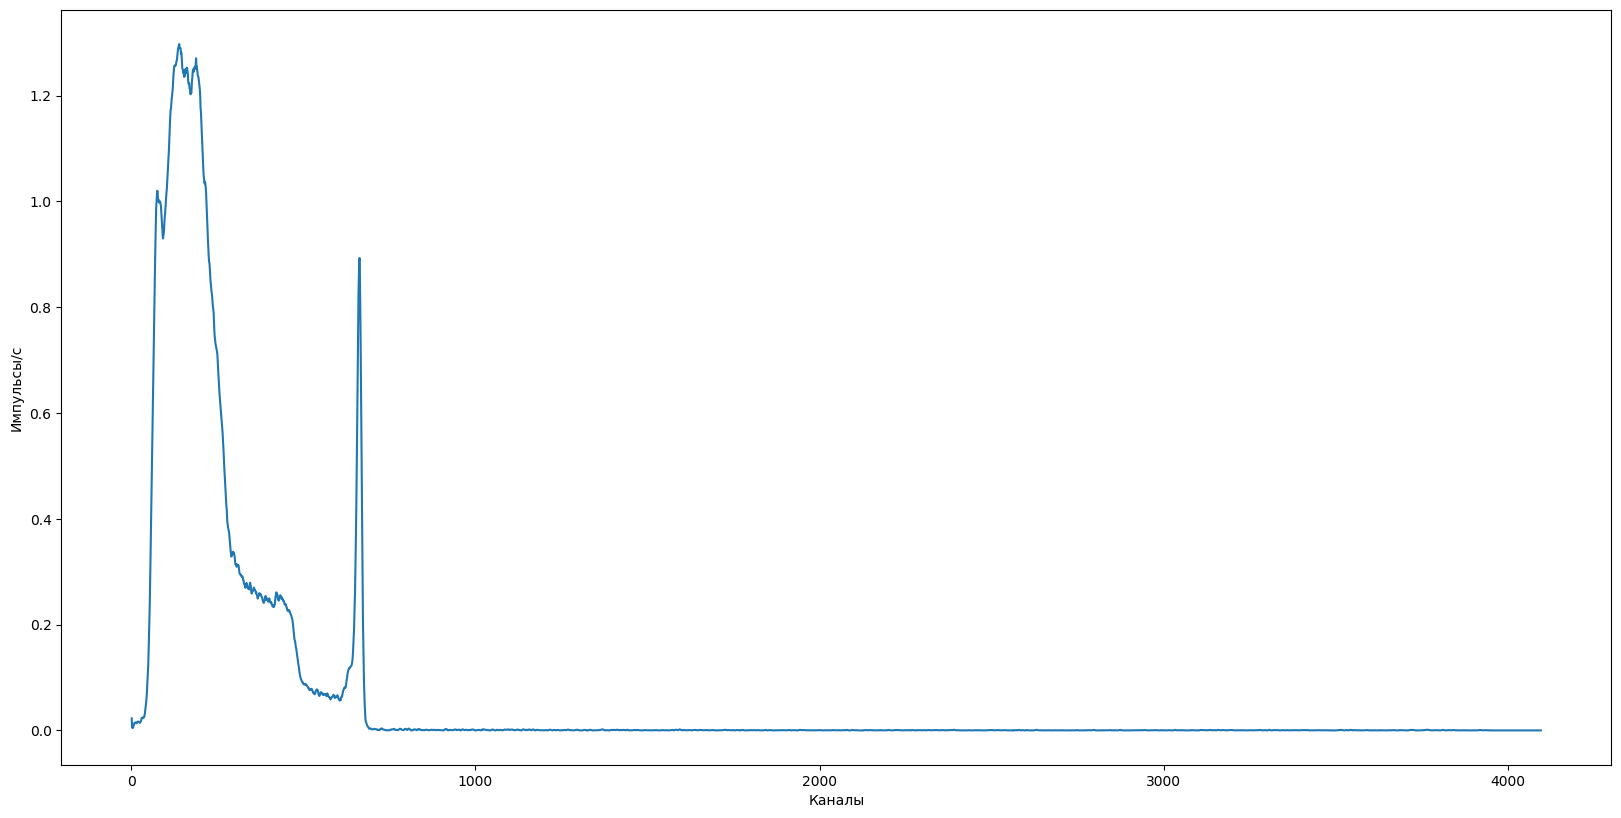

In [198]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

fig=plt.figure(figsize=(20,10), dpi=100)
plt.plot(np.arange(1,4097,1), ch_13[0])
plt.xlabel('Каналы')
plt.ylabel('Импульсы/c')
fig.savefig('after_filter_13', fmt='png')

In [199]:
from scipy.optimize import minimize
from scipy import integrate
import numpy as np

h=1 #высота от детектора до источника

#chanel_out=[]
#mistake=[]
#mistake_last=[]

x=np.arange(0,1.1,0.1) 

#bnds=((0, None),(0,None))

#f_problems=open('problems.txt', 'w')

#f_out=open('koeff.txt', 'w')
#f_nevyazka=open('nevyazka.txt','w')

#f_tmpout_alpha=open('tmp_alpha.txt', 'w')
#f_tmpout_beta=open('tmp_beta.txt', 'w')
#f_tmplast_alpha=open('tmplast_alpha.txt', 'w')
#f_tmplast_beta=open('tmplast_beta.txt', 'w')
#f_integr_in=open('integr_in.txt', 'w')
#f_integr_out=open('integr_out.txt', 'w')

#ch_alpha=[]
#ch_beta=[]
# ch_alpha_last=[]
# ch_beta_last=[]

sheet5 = book.add_sheet('Интегрирование')

row_first = sheet5.row(0)
row_first.write(0, 'Номер интервала')
row_first.write(1, 'Коэффициент alpha')
row_first.write(2, 'Коэффициент beta')
row_first.write(3, 'Квадратный корень из невязки')
row_first.write(4, 'Значение интеграла на интервале')
#row_first.write(5, '')
#row_first.write(6, '')

#for p in range(4096):

# for i in range(11):
#     for p in range(4096):
#         chanel[i][p] = ch_13[i][p]
        
for k in range(9):
        
    row = sheet5.row(k + 1)
    row.write(0, k + 1)
        
#     def f(x,alpha,beta):
#         return alpha*h**(beta)/(h**2 + x**2)**((beta + 2)/2) 
        
#     def delta(alpha, beta):
#         d=0
#         for i in range(2):
#             d=d+(f(x[k + i],alpha,beta)-ch_13[k + i][661])**2 
#         return d
    
    alpha = 0.98
    
    def f(x, beta):
        return alpha*h**(beta)/(h**2 + x**2)**((beta + 2)/2) 
        
    def delta(beta):
        d=0
        for i in range(3):
            d=d+(f(x[k + i], beta) - ch_13[k + i][560])**2 
        return d


    res=minimize(lambda x: delta(*x), 1)
    a = alpha
    b = res.x[0]
#     res=minimize(lambda x: delta(*x), [1,1])
#     a=res.x[0]
#     b=res.x[1]
    
    #row.write(1, a)
    row.write(1, a)
    row.write(2, b)
    row.write(3, (res.fun)**0.5)
        
    def g(x):
        return 2*np.pi*a*x*h**b/(h**2 + x**2)**((b + 2)/2)
    
    carpet=integrate.quad(g, k/10, (k + 1)/10)
    row.write(4, carpet[0])

k = k + 1

row = sheet5.row(k + 1)
row.write(0, k + 1)

def f(x, beta):
    return alpha*h**(beta)/(h**2 + x**2)**((beta + 2)/2) 
        
def delta(beta):
    d=0
    for i in range(2):
        d=d+(f(x[k + i], beta) - ch_13[k + i][560])**2 
    return d

# def f(x,alpha,beta):
#     return alpha*h**(beta)/(h**2 + x**2)**((beta + 2)/2) 
        
# def delta(alpha, beta):
#     d=0
#     for i in range(2):
#         d=d+(f(x[k + i],alpha,beta)-ch_13[k + i][661])**2 
#     return d

res=minimize(lambda x: delta(*x), 1)
a = alpha
b = res.x[0]

# res=minimize(lambda x: delta(*x), [1,1])
# a=res.x[0]
# b=res.x[1]

row.write(1, a)
row.write(2, b)
row.write(3, (res.fun)**0.5)
        
def g(x):
    return 2*np.pi*a*x*h**b/(h**2 + x**2)**((b + 2)/2)
    
carpet=integrate.quad(g, k/10, (k + 1)/10)
row.write(4, carpet[0])

row = sheet5.row(k + 2)
row.write(0, 'от 100см до бесконечности')
row.write(1, a)
row.write(2, b)
row.write(3, (res.fun)**0.5)
carpet=integrate.quad(g, 1, np.inf)
row.write(4, carpet[0])
    
    # проинтегрировал интерполирующую функцию на интервале (0,1)

#     def f_last(x, alpha,beta):
#         return alpha*h**(beta)/(h**2+x**2)**((beta+2)/2)

#     def delta_last(alpha,beta):
#         d=0
#         for i in range(9,11):
#             d=d+(f_last(x[i],alpha,beta)-chanel[i][p])**2 
#         return d

#     res_last=minimize(lambda x: delta_last(*x), [1,1])
#     a=res_last.x[0]
#     b=res_last.x[1]
    
#     mistake_last.append((res_last.fun)**0.5)
    
    #f_out.write('на последнем интервале alpha='+ str("%.4f" % a) + ', beta= ' + str("%.4f" % b) + '\n')
    #f_nevyazka.write('  ' + str("%.6f" % res_last.fun) + '\n')
    
    #ch_alpha.append(a)
    #ch_beta.append(b)
    
#     f_tmplast_alpha.write(str("%.6f" % a) + '\n')
#     f_tmplast_beta.write(str("%.6f" % b) + '\n')
    
#     if b<0:
#         f_problems.write(str(p+1) + ' last ' + ' beta = ' + str("%.5f" % b) + '\n')
#         b=1
       
    # получил альфа и бета для последнего интервала

#     def g_last(x):
#         return 2*np.pi*a*x*h**b/(h**2+x**2)**((b+2)/2)
    
#     carpet_last=integrate.quad(g_last,1, np.inf)
         
    # проинтегрировал интерполирующую функцию с коэффициентами из последнего интервала по бесконечности
    
#     chanel_out.append(carpet[0]+carpet_last[0])
#     f_integr_in.write(str("%.6f" % carpet[0]) + '\n')
#     f_integr_out.write(str("%.6f" % carpet_last[0]) + '\n')
    
    
# f_integr=open('integr.txt', 'w')
# f_integr.write('кэВ  ' + '  имп*м^2/с' + '\n')

# f_mistake=open('mistake.txt', 'w')
# f_mistake_last=open('mistake_last.txt', 'w')

# for i in range(4096):
#     f_integr.write(str("%.6f" % chanel_out[i]) + '\n')
#     f_mistake.write(str("%.6f" % mistake[i]) + '\n')
#     f_mistake_last.write(str("%.6f" % mistake_last[i]) + '\n')

    
#f_out.close()
#f_tmplast_alpha.close()    
#f_tmplast_beta.close()
#f_integr.close()
#f_tmpout_alpha.close()
#f_tmpout_beta.close()
#f_mistake.close()
#f_mistake_last.close()
#f_problems.close()
#f_integr_in.close()
#f_integr_out.close()
#f_nevyazka.close()
book.save("chanel_662.xls")      

In [200]:
Am = 143
sgla = (1/Am)*((-11)*0.104686 + 9*0.112004 + 16*0.132412 + 21*0.148516 + 24*0.150843 + 26*0.157872 + 24*0.164901 + 21* + 16*ch_13[0][p+3] + 9*ch_13[0][p+4] - 11*ch_13[i][p+6])

print(sqla)

IndexError: list index out of range